# 서울시 생활정보 기반 대중교통 수요 분석 프로젝트

---

### 필요 라이브러리 설치

In [ ]:
# 아래 코드 주석(#) 제거 후 사용
# !pip install -r ./requirements.txt

## Step 1. 데이터 분석 - 버스 정류장 데이터

[기본 데이터]
* 1.1 bus_station_boarding_month_202401.csv

* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_202401.xlsx

* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

## Step 1.1. 데이터 불러오기

####  데이터 프레임을 불러오고 변수로 저장(CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 sklearn 라이브러리를 통해 모델을 학습시키고 저장할 때 많이 사용, 파이썬의 모든 객체를 파일로 저장 가능

#### 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 bus_station_boarding_month_202401.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요

In [1]:
# 라이브러리 호출
import sys
import numpy as np
import pandas as pd

In [2]:
# Pandas로 csv 데이터 호출
## sep : csv 파일의 구분자로 csv 형식은 보통 ","를 구분자로 사용한다.
## encoding : csv 파일의 인코딩 형식으로 utf-8, utf-16, euc-kr, cp949 등이 존재한다
bus_station = pd.read_csv('./1.1 bus_station_boarding_month_202401.csv', sep=",", encoding = "cp949")

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
bus_station.shape

(1048575, 8)

---

## Step 1.2. 기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### 기본 정보 확인
* 'bus_station' 데이터의 정보 확인
* 'describe', 'info', 'head'

In [4]:
# head() : 데이터프레임 상위 n개의 행 출력. (n) -> 숫자를 적으면 숫자만큼 행 출력
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104


In [5]:
# tail() : 데이터프레임 하위 n개의 행 출력. (n) -> 숫자를 적으면 숫자만큼 행 출력
bus_station.tail()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129


In [6]:
# info() : 데이터프레임 각 컬럼에 대한 정보 출력
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1048575 non-null  int64 
 1   노선번호        1048575 non-null  object
 2   노선명         1048575 non-null  object
 3   버스정류장ARS번호  1048575 non-null  object
 4   역명          1048575 non-null  object
 5   승차총승객수      1048575 non-null  int64 
 6   하차총승객수      1048575 non-null  int64 
 7   등록일자        1048575 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 64.0+ MB


In [7]:
# describe() : 각 컬럼 별 기초통계량 출력
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.024011e+07,1.030953e+02,1.010178e+02,2.024012e+07
std,7.455044e+00,1.486801e+02,1.348374e+02,7.455044e+00
min,2.024010e+07,0.000000e+00,0.000000e+00,2.024010e+07
25%,2.024011e+07,1.300000e+01,1.600000e+01,2.024011e+07
50%,2.024011e+07,5.700000e+01,6.200000e+01,2.024012e+07
75%,2.024012e+07,1.370000e+02,1.370000e+02,2.024012e+07
max,2.024013e+07,5.027000e+03,4.352000e+03,2.024013e+07


#### 자치구 컬럼 생성
* 버스정류장 ARS번호의 앞 두자리가 구를 의미
* '자치구' column을 추가 -> 정류장이 위치한 구 이름을 등록

In [8]:
# "버스정류장ARS번호" 컬럼 확인
print(bus_station['버스정류장ARS번호'].head())
print(bus_station['버스정류장ARS번호'].info())

0     6178
1    22337
2    22336
3    22334
4    22333
Name: 버스정류장ARS번호, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 1048575 entries, 0 to 1048574
Series name: 버스정류장ARS번호
Non-Null Count    Dtype 
--------------    ----- 
1048575 non-null  object
dtypes: object(1)
memory usage: 8.0+ MB
None


In [9]:
# 버스정류장 ARS번호에서 시작하는 앞자리 2개로 '자치구'라는 새로운 컬럼 생성
# str() : 정수나 실수를 문자열 형태로 바꿔주는 함수, slice()
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(str)

gu_info = []
for i in range(len(bus_station)):
    ars_info = bus_station['버스정류장ARS번호'][i]
    if len(ars_info) == 4:
        gu_info.append(ars_info[0])
    elif len(ars_info) == 5:
        gu_info.append(ars_info[:2])
    else:
        gu_info.append('~')

bus_station['자치구'] = gu_info

* 버스정류장 ARS 번호 : 01~25까지 앞 숫자 두개가 위치한 구를 의미
    01. 종로구
    02. 중구
    03. 용산구
    04. 성동구
    05. 광진구
    06. 동대문구
    07. 중랑구
    08. 성북구
    09. 강북구
    10. 도봉구
    11. 노원구
    12. 은평구
    13. 서대문구
    14. 마포구
    15. 양천구
    16. 강서구
    17. 구로구
    18. 금천구
    19. 영등포구
    20. 동작구
    21. 관악구
    22. 서초구
    23. 강남구
    24. 송파구
    25. 강동구

In [10]:
# 구 코드를 구 이름으로 변환하기
# map() : 리스트, 튜플 등 반복 가능한 데이터 집합을 입력으로 받아 변환하는 함수

bus_station['자치구'] = bus_station['자치구'].map({
    '1': '종로구',
    '2': '중구',
    '3': '용산구',
    '4': '성동구',
    '5': '광진구',
    '6': '동대문구',
    '7': '중랑구',
    '8': '성북구',
    '9': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})


In [11]:
# 하위 10개의 행을 출력하여 처리 결과 확인
bus_station.tail(10)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
1048565,20240126,종로05,종로05(서대문역~배화여중고),1849,강북삼성병원(00027),6,175,20240129,종로구
1048566,20240126,종로03,종로03(낙산공원~종로5가),1825,창신초교(00021),63,86,20240129,종로구
1048567,20240126,종로05,종로05(서대문역~배화여중고),1796,배화여중고.매동초교(00017),22,91,20240129,종로구
1048568,20240126,종로05,종로05(서대문역~배화여중고),1820,교남동주민센터(00022),7,25,20240129,종로구
1048569,20240126,종로05,종로05(서대문역~배화여중고),1554,독립문역3번출구(00006),343,191,20240129,종로구
1048570,20240126,종로05,종로05(서대문역~배화여중고),1837,스위스대사관(00025),1,19,20240129,종로구
1048571,20240126,종로05,종로05(서대문역~배화여중고),1831,월암공원(00024),25,21,20240129,종로구
1048572,20240126,종로05,종로05(서대문역~배화여중고),1514,적십자병원후문앞(00002),9,6,20240129,종로구
1048573,20240126,성북07,성북07(정릉4동종점~길음역),8454,정릉4동종점(00014),0,181,20240129,성북구
1048574,20240126,종로05,종로05(서대문역~배화여중고),1587,신학대학교총회본부(00011),13,68,20240129,종로구


#### 결측치 처리

In [12]:
# (가상), (기점가상) 정류장은 ARS번호가 '~'로 나옵니다.
# (가상) 정류장 : 버스정보시스템 상에서 위치 정보를 표시하기 위해 임의로 가상의 정류장을 설정, 실제하지 않음
# '버스정류장ARS번호'가 '~'인 곳을 확인해주세요.

# '버스정류장ARS번호'가 '~'인 행들을 필터링
virtual_stations = bus_station[bus_station['버스정류장ARS번호'] == '~']

# 결과 출력
virtual_stations.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
699,20240101,441,441번(월암공영차고지~신사사거리),~,월암차고지(종점가상)(00126),0,1,20240104,NaN
1261,20240101,7021,7021번(은평공영차고지~롯데백화점),~,은평공영차고지(가상)(00076),0,10,20240104,NaN
1337,20240101,7017,7017번(은평공영차고지~롯데백화점),~,은평공영차고지(가상)(00090),0,10,20240104,NaN
1427,20240101,7016,7016번(은평차고지~상명대),~,은평공영차고지(가상)(00107),0,16,20240104,NaN
3332,20240101,750B,750B번(은평차고지~서울대),~,은평공영차고지(가상)(00076),0,15,20240104,NaN


In [13]:
# NaN 값 제거
# dropna()
bus_station.dropna(inplace=True)
print(bus_station.isna().sum())

사용일자          0
노선번호          0
노선명           0
버스정류장ARS번호    0
역명            0
승차총승객수        0
하차총승객수        0
등록일자          0
자치구           0
dtype: int64


In [14]:
# 컬럼별 NaN 값이 있는지 확인, info()

bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960811 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사용일자        960811 non-null  int64 
 1   노선번호        960811 non-null  object
 2   노선명         960811 non-null  object
 3   버스정류장ARS번호  960811 non-null  object
 4   역명          960811 non-null  object
 5   승차총승객수      960811 non-null  int64 
 6   하차총승객수      960811 non-null  int64 
 7   등록일자        960811 non-null  int64 
 8   자치구         960811 non-null  object
dtypes: int64(4), object(5)
memory usage: 73.3+ MB


In [15]:
# "버스정류장ARS번호" dtype을 정수형(int)으로 변경

bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(int)

#### 구별로 버스정류장의 개수 확인하기 (서울시)

In [16]:
# 자치구별 버스정류장 고유값들의 갯수를 출력하여 'bus_station_count' 변수로 저장
# nunique(), groupby()

bus_station_count = bus_station.groupby('자치구', as_index=False)['버스정류장ARS번호'].nunique()
bus_station_count

,자치구,버스정류장ARS번호
0,강남구,501
1,강동구,367
2,강북구,410
3,강서구,567
4,관악구,468
5,광진구,280
6,구로구,486
7,금천구,347
8,노원구,496
9,도봉구,368


In [17]:
# 중랑구에 428개의 버스정류장이 있다는데, 실제 ARS번호를 확인해봅시다.
# 자치구별 버스정류장 고유값들을 출력하여 'bus_station_unique' 변수로 저장
# 중랑구 버스정류장ARS번호 전체 출력

# 자치구별로 '버스정류장ARS번호'의 고유값을 저장
bus_station_unique = bus_station.groupby('자치구')['버스정류장ARS번호'].unique()

# 중랑구 버스정류장ARS번호 전체 출력
print("중랑구 버스정류장 ARS번호:")
print(bus_station_unique['중랑구'])

중랑구 버스정류장 ARS번호:
[7142 7136 7138 7465 7440 7438 7432 7433 7435 7434 7008 7007 7336 7335
 7334 7333 7297 7296 7295 7294 7274 7273 7272 7271 7270 7269 7249 7247
 7245 7243 7233 7231 7229 7227 7225 7223 7222 7221 7220 7219 7218 7217
 7216 7199 7197 7195 7194 7145 7144 7131 7129 7117 7006 7005 7004 7003
 7002 7001 7616 7817 7830 7828 7831 7021 7587 7595 7592 7593 7594 7820
 7818 7819 7516 7515 7502 7501 7554 7553 7500 7499 7498 7496 7494 7821
 7829 7832 7043 7045 7060 7057 7054 7058 7020 7014 7011 7013 7015 7016
 7446 7551 7466 7463 7464 7462 7451 7450 7454 7455 7452 7453 7456 7448
 7332 7331 7330 7329 7328 7327 7325 7300 7299 7298 7250 7248 7246 7244
 7242 7232 7230 7228 7226 7224 7211 7210 7209 7208 7207 7206 7205 7204
 7203 7192 7191 7190 7189 7188 7187 7143 7141 7140 7118 7410 7476 7302
 7304 7305 7306 7337 7418 7010 7009 7550 7303 7307 7420 7421 7424 7012
 7178 7180 7181 7182 7183 7184 7185 7186 7111 7112 7113 7114 7115 7116
 7275 7276 7277 7278 7279 7280 7261 7262 7263 7264 7265 7266

In [18]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인
# 중랑구의 버스정류장ARS번호 7674 인 정류장 확인해보기
bus_station['버스정류장ARS번호'] = bus_station['버스정류장ARS번호'].astype(str)
seoul_outside = bus_station[~bus_station['버스정류장ARS번호'].str[0].astype(int).isin(range(1, 26))]
seoul_outside.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구


In [19]:
# 중랑구의 버스정류장ARS번호 7674인 정류장 확인 --> 서울의 버스가 아닌 분당으로 가는 버스이다.
station_7674 = bus_station[(bus_station['자치구'] == '중랑구') & (bus_station['버스정류장ARS번호'] == "7674")]
print("\n중랑구의 버스정류장ARS번호 7674인 정류장:")
station_7674.head()


중랑구의 버스정류장ARS번호 7674인 정류장:


,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
43608,20240102,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,1,20240105,중랑구
84449,20240103,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,1,20240106,중랑구
206641,20240106,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),3,0,20240109,중랑구
287124,20240108,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),0,2,20240111,중랑구
327856,20240109,9409,9409번(구미동차고지~신사역),7674,이우중고(00005),1,4,20240112,중랑구


In [20]:
# 서울의 버스 정류장 데이터만 포함하고 있는 excel 파일 열기 ('1.1 bus_station_202401.xlsx')
# https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (출처:서울열린데이터광장)
# 'only_seoul' 변수로 저장

only_seoul = pd.read_excel('./1.1 bus_station_202401.xlsx')

In [21]:
# 데이터 구조 확인, info()
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11263 entries, 0 to 11262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS_ID  11263 non-null  int64 
 1   정류소명    11263 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.1+ KB


In [22]:
# 데이터 확인
only_seoul.tail()

,ARS_ID,정류소명
11258,25995,우성아파트
11259,25996,우성아파트
11260,25997,조일약국
11261,25998,성내시장
11262,25999,천호우체국.로데오거리


In [23]:
# 서울 지역 외 '버스정류장ARS번호' 샘플 확인
only_seoul['ARS_ID'] = only_seoul['ARS_ID'].astype(str)
filtered_df = only_seoul[~only_seoul['ARS_ID'].str[0].astype(int).isin(range(1, 26))]

filtered_df.head()

,ARS_ID,정류소명


In [24]:
# 'ARS-ID'열 이름을 '버스정류장ARS번호'로 바꾸기

only_seoul.rename(columns={'ARS_ID':'버스정류장ARS번호'},inplace=True)
only_seoul.head()

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [25]:
# 'only_seoul'과 'bus_station' 데이터 병합
only_seoul['버스정류장ARS번호'] = only_seoul['버스정류장ARS번호'].astype(str)
merge_df = pd.merge(bus_station, only_seoul, how='inner',on='버스정류장ARS번호')
merge_df.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구,정류소명
0,20240101,101,101번(화계사~동대문),6178,대광고등학교앞(00055),39,76,20240104,동대문구,대광고등학교앞
1,20240101,9408,9408번(구미동차고지~고속터미널),22337,헌인마을.서울농업기술센터(00042),1,0,20240104,서초구,헌인마을.서울농업기술센터
2,20240101,9408,9408번(구미동차고지~고속터미널),22336,헌인마을.서울농업기술센터(00078),2,0,20240104,서초구,헌인마을.서울농업기술센터
3,20240101,9408,9408번(구미동차고지~고속터미널),22334,헌인릉.강남서초과학화예비군훈련장(00043),0,2,20240104,서초구,헌인릉.강남서초과학화예비군훈련장
4,20240101,9408,9408번(구미동차고지~고속터미널),22333,헌인릉.강남서초과학화예비군훈련장(00076),2,1,20240104,서초구,헌인릉.강남서초과학화예비군훈련장


In [26]:
# 구 별로 버스 정류장의 개수 확인하기, 'seoul_bus_station_ARS' 변수로 저장

seoul_bus_station_ARS = merge_df.groupby('자치구', as_index=False)['버스정류장ARS번호'].nunique()
seoul_bus_station_ARS

,자치구,버스정류장ARS번호
0,강남구,501
1,강동구,367
2,강북구,410
3,강서구,567
4,관악구,466
5,광진구,274
6,구로구,486
7,금천구,346
8,노원구,495
9,도봉구,366


In [27]:
# 서울시에 있는 버스정류장 개수 구하기

seoul_bus_station_ARS['버스정류장ARS번호'].sum()

10652

#### 구 별로 버스 노선의 개수 확인하기

In [28]:
# 자치구별 노선번호의 개수 구하기, 'seoul_bus_station_line' 변수로 저장

seoul_bus_station_line = merge_df.groupby('자치구', as_index=False)['노선번호'].nunique()
seoul_bus_station_line

,자치구,노선번호
0,강남구,98
1,강동구,22
2,강북구,71
3,강서구,51
4,관악구,81
5,광진구,43
6,구로구,80
7,금천구,56
8,노원구,58
9,도봉구,54


#### 각 구별로 승차 총 승객수, 하차 총 승객수 구하기

In [29]:
# 자치구별 "승차총승객수","하차총승객수"의 합 구하기, 'seoul_bus_station_sum' 변수로 저장
# groupby()

seoul_bus_station_sum = merge_df.groupby('자치구', as_index=False)[['승차총승객수','하차총승객수']].sum()
seoul_bus_station_sum

,자치구,승차총승객수,하차총승객수
0,강남구,6960336,6597087
1,강동구,2515582,2460905
2,강북구,3998077,3858057
3,강서구,3981173,3963283
4,관악구,5862490,5996915
5,광진구,2365355,2382437
6,구로구,4204229,4023135
7,금천구,3133461,3014364
8,노원구,3553485,3497450
9,도봉구,2771076,2695540


#### 각 구별 승차 평균 승객수, 하차 평균 승객수 구하기

In [30]:
# 자치구별 "승차총승객수","하차총승객수"의 평균 구하기, 'seoul_bus_station_mean' 변수로 저장
# '승차총승객수' -> '승차평균승객수', '하차총승객수' -> '하차평균승객수'로 열이름 변경

seoul_bus_station_mean = merge_df.groupby('자치구', as_index=False)[['승차총승객수','하차총승객수']].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'},inplace=True)
seoul_bus_station_mean

,자치구,승차평균승객수,하차평균승객수
0,강남구,123.257234,116.824633
1,강동구,91.578944,89.588445
2,강북구,126.465395,122.036345
3,강서구,86.932767,86.542122
4,관악구,134.946712,138.040996
5,광진구,107.491706,108.267985
6,구로구,114.700415,109.759781
7,금천구,123.088384,118.410025
8,노원구,83.356439,82.041989
9,도봉구,101.649829,98.878985


#### 데이터 프레임 합치기

In [31]:
# 네 개 파일을 합쳐주세요.

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean

# 첫 번째와 두 번째 데이터프레임 합치기
temp1 = pd.merge(seoul_bus_station_ARS, seoul_bus_station_line, on='자치구', how='inner')

temp2_2 = pd.merge(temp1, seoul_bus_station_sum, on='자치구', how='inner')

seoul_bus_data = pd.merge(temp2_2, seoul_bus_station_mean, on='자치구', how='inner')

In [32]:
seoul_bus_data.head()

,자치구,버스정류장ARS번호,노선번호,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996


In [33]:
# '버스정류장ARS번호' -> '정류장수', '노선번호' -> '노선수'로 열이름 변경

seoul_bus_data.rename(columns={'버스정류장ARS번호':'정류장수',
                          '노선번호':'노선수'},inplace=True)

In [34]:
# 데이터를 합친 결과를 확인합니다.

seoul_bus_data.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336,6597087,123.257234,116.824633
1,강동구,367,22,2515582,2460905,91.578944,89.588445
2,강북구,410,71,3998077,3858057,126.465395,122.036345
3,강서구,567,51,3981173,3963283,86.932767,86.542122
4,관악구,466,81,5862490,5996915,134.946712,138.040996


In [35]:
# 해당 데이터프레임을 csv 파일로 저장하세요.

seoul_bus_data.to_csv("./only_seoul.csv",index=False)

---

## Step 1.3.데이터 시각화
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [36]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

# For Mac OS
plt.rc('font', family='AppleGothic')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# # For Windows
# plt.rc('font', family='Malgun Gothic')
# sns.set(font="Malgun Gothic", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

#### 데이터 분포 시각화

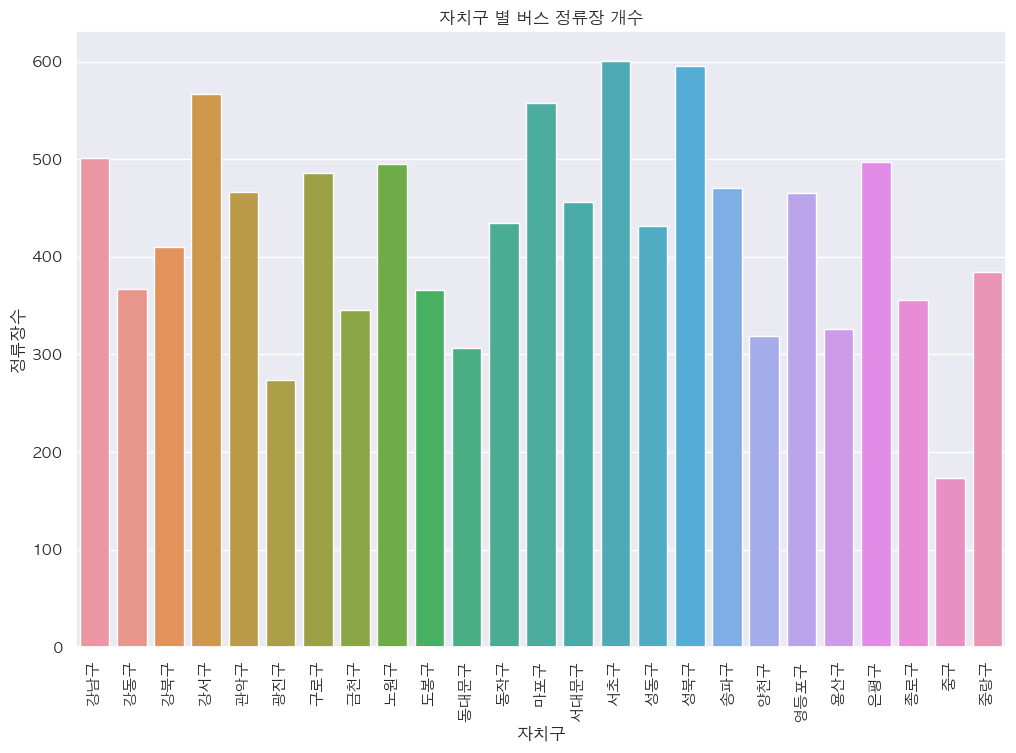

In [37]:
# 자치구별 정류장 수를 볼 수 있는 그래프를 출력해주세요.

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 구 별 버스 노선 개수 그래프
sns.barplot(x='자치구', y='정류장수', data=seoul_bus_data)
plt.xticks(rotation=90)
plt.title('자치구 별 버스 정류장 개수')

plt.show()

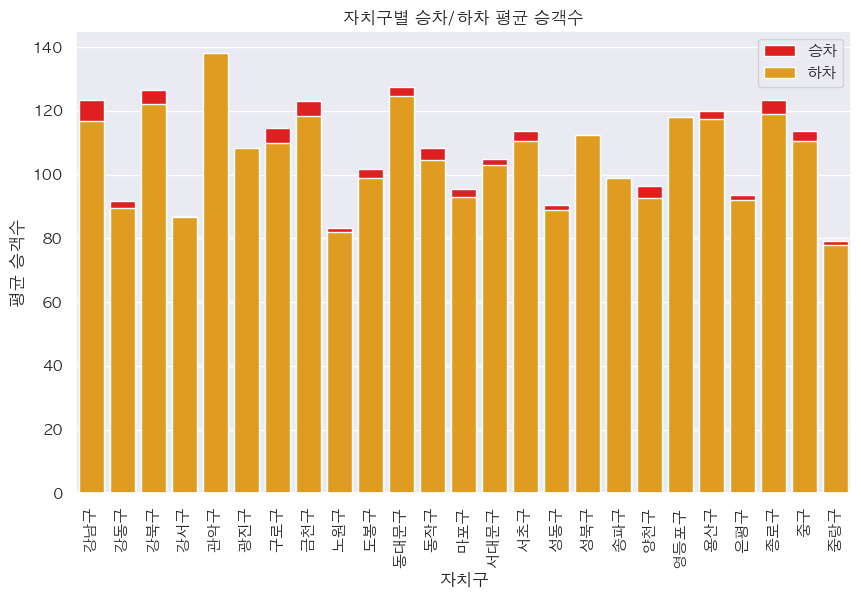

In [38]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기
sns.barplot(data=seoul_bus_data, x="자치구", y="승차평균승객수", color="red", label="승차")
sns.barplot(data=seoul_bus_data, x="자치구", y="하차평균승객수", color="orange", label="하차")

# 범례 표시
plt.legend()

# 그래프 제목과 라벨 설정
plt.title("자치구별 승차/하차 평균 승객수")
plt.xlabel("자치구")
plt.ylabel("평균 승객수")
plt.xticks(rotation=90)
# 그래프 출력
plt.show()

In [39]:
# 노선당 평균 승객수 계산
seoul_bus_data['노선당_승차평균'] = seoul_bus_data['승차평균승객수'] / seoul_bus_data['노선수']
seoul_bus_data['노선당_하차평균'] = seoul_bus_data['하차평균승객수'] / seoul_bus_data['노선수']

# 노선당 평균 승객수가 높은 자치구 확인
top_승차 = seoul_bus_data.sort_values(by='노선당_승차평균', ascending=False).head()
top_하차 = seoul_bus_data.sort_values(by='노선당_하차평균', ascending=False).head()

# 노선당 평균 승객수가 낮은 자치구 확인
bottom_승차 = seoul_bus_data.sort_values(by='노선당_승차평균', ascending=True).head()
bottom_하차 = seoul_bus_data.sort_values(by='노선당_하차평균', ascending=True).head()

# 결과 출력
print("노선당 평균 승차 승객수가 높은 자치구:")
print(top_승차[['자치구', '노선당_승차평균']])
print("\n노선당 평균 하차 승객수가 높은 자치구:")
print(top_하차[['자치구', '노선당_하차평균']])

print("\n노선당 평균 승차 승객수가 낮은 자치구:")
print(bottom_승차[['자치구', '노선당_승차평균']])
print("\n노선당 평균 하차 승객수가 낮은 자치구:")
print(bottom_하차[['자치구', '노선당_하차평균']])

노선당 평균 승차 승객수가 높은 자치구:
   자치구  노선당_승차평균
1  강동구  4.162679
5  광진구  2.499807
7  금천구  2.198007
9  도봉구  1.882404
2  강북구  1.781203

노선당 평균 하차 승객수가 높은 자치구:
   자치구  노선당_하차평균
1  강동구  4.072202
5  광진구  2.517860
7  금천구  2.114465
9  도봉구  1.831092
2  강북구  1.718822

노선당 평균 승차 승객수가 낮은 자치구:
     자치구  노선당_승차평균
12   마포구  0.955785
13  서대문구  0.960737
23    중구  1.114703
16   성북구  1.145804
14   서초구  1.147689

노선당 평균 하차 승객수가 낮은 자치구:
     자치구  노선당_하차평균
12   마포구  0.929832
13  서대문구  0.943571
23    중구  1.083633
14   서초구  1.115797
11   동작구  1.124953


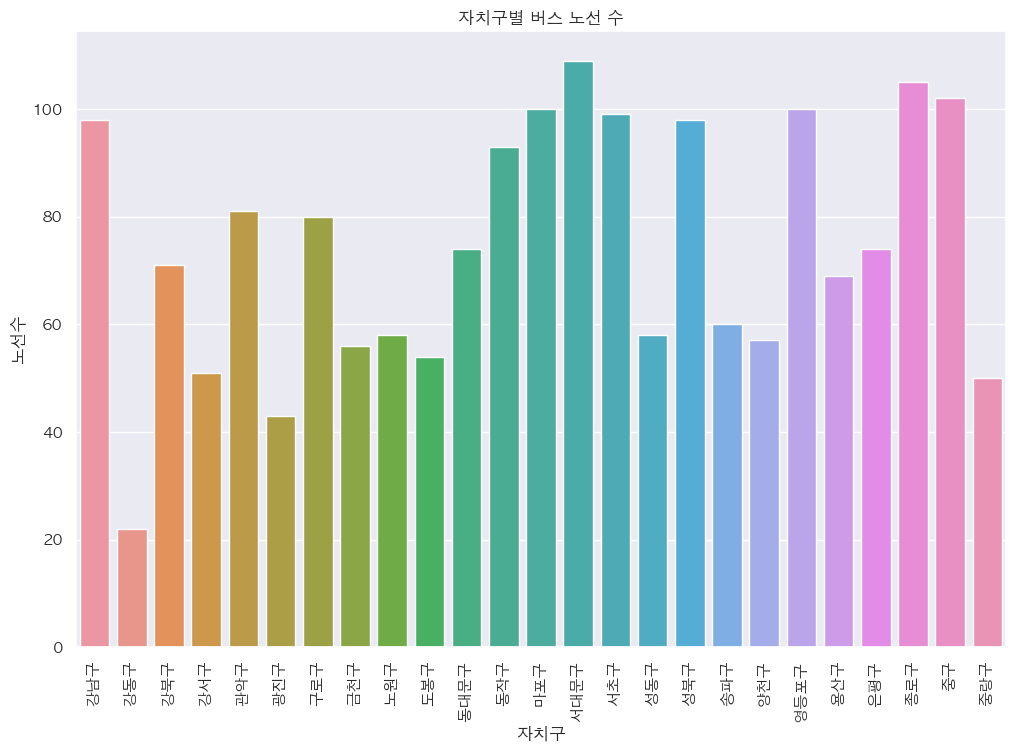

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(x='자치구', y='노선수', data=seoul_bus_data)
plt.xticks(rotation=90)
plt.title('자치구별 버스 노선 수')
plt.show()

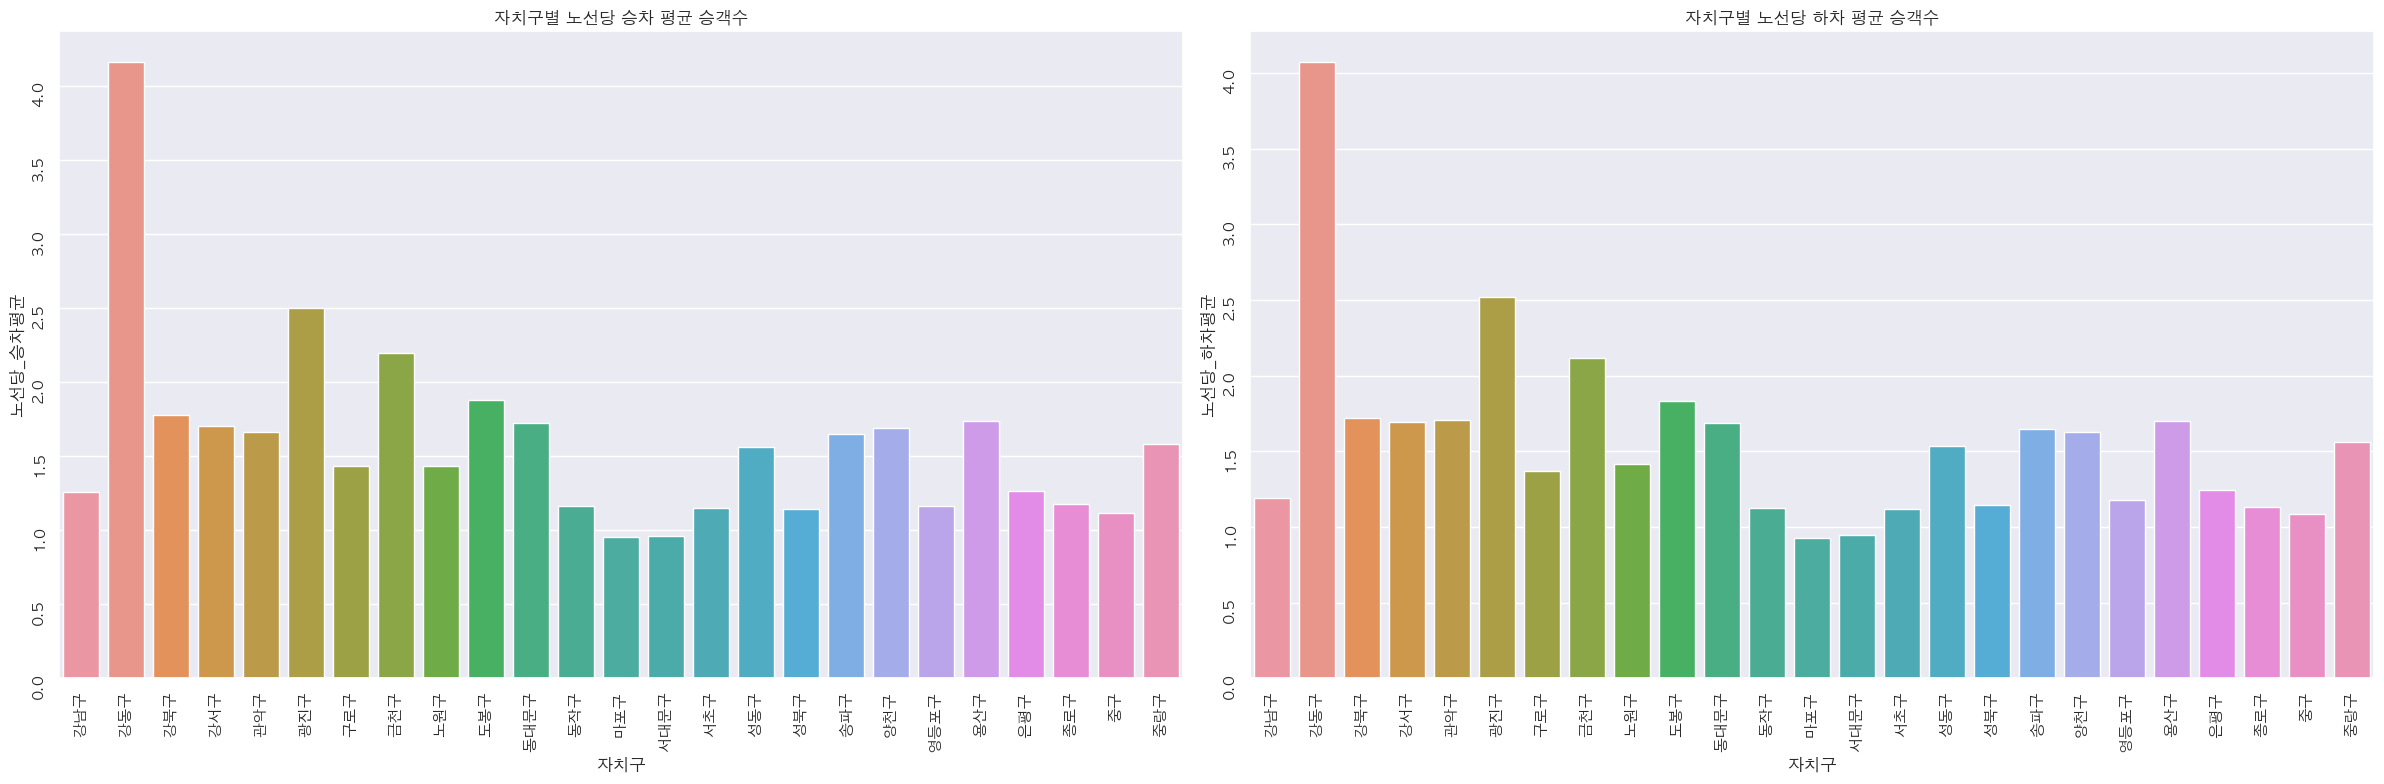

In [41]:
# 노선수 대비 승차평균승객수 계산
seoul_bus_data['노선당_승차평균'] = seoul_bus_data['승차평균승객수'] / seoul_bus_data['노선수']
# 노선수 대비 하차평균승객수 계산
seoul_bus_data['노선당_하차평균'] = seoul_bus_data['하차평균승객수'] / seoul_bus_data['노선수']

fig, ax = plt.subplots(1, 2, figsize=(24, 8)) # 1행 2열의 subplot 생성

# 자치구별 노선당 승차 평균 승객수
sns.barplot(x='자치구', y='노선당_승차평균', data=seoul_bus_data, ax=ax[0])
ax[0].set_title('자치구별 노선당 승차 평균 승객수')
ax[0].tick_params(labelrotation=90)

# 자치구별 노선당 하차 평균 승객수
sns.barplot(x='자치구', y='노선당_하차평균', data=seoul_bus_data, ax=ax[1])
ax[1].set_title('자치구별 노선당 하차 평균 승객수')
ax[1].tick_params(labelrotation=90)

plt.tight_layout()
plt.show()

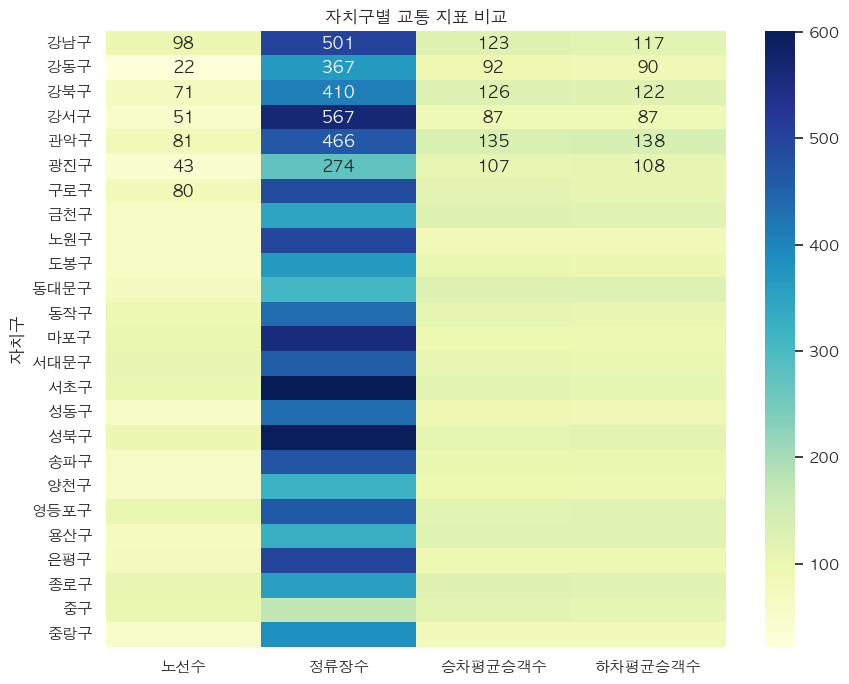

In [42]:
# 자치구를 인덱스로 설정
seoul_bus_data_indexed = seoul_bus_data.set_index('자치구')

# 히트맵 데이터 준비 (승차평균승객수와 하차평균승객수만 포함하여 예시를 보여줌)
heatmap_data = seoul_bus_data_indexed[['노선수', '정류장수', '승차평균승객수', '하차평균승객수']]

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('자치구별 교통 지표 비교')
plt.show()

In [43]:
# 기술통계 분석
descriptive_stats = seoul_bus_data.describe()
print("기술통계 분석 결과:")
print(descriptive_stats)

기술통계 분석 결과:
             정류장수         노선수        승차총승객수        하차총승객수     승차평균승객수  \
count   25.000000   25.000000  2.500000e+01  2.500000e+01   25.000000   
mean   426.080000   74.480000  4.110994e+06  4.029876e+06  107.525945   
std    105.022982   23.331167  1.158910e+06  1.138603e+06   15.238023   
min    173.000000   22.000000  2.365355e+06  2.331836e+06   79.082866   
25%    356.000000   57.000000  3.200879e+06  3.155827e+06   95.578543   
50%    435.000000   74.000000  4.125466e+06  3.979142e+06  108.467845   
75%    495.000000   98.000000  4.746623e+06  4.744766e+06  119.962938   
max    601.000000  109.000000  6.960336e+06  6.597087e+06  134.946712   

          하차평균승객수   노선당_승차평균   노선당_하차평균  
count   25.000000  25.000000  25.000000  
mean   105.372406   1.602759   1.571830  
std     14.983362   0.652528   0.642166  
min     77.969784   0.955785   0.929832  
25%     92.738804   1.167112   1.147755  
50%    108.267985   1.560259   1.534389  
75%    117.447907   1.723960   1.702

상관분석 결과:
              정류장수       노선수    승차총승객수    하차총승객수   승차평균승객수   하차평균승객수  \
정류장수      1.000000  0.272398  0.586011  0.594953 -0.179891 -0.158523   
노선수       0.272398  1.000000  0.692430  0.681820  0.475907  0.458596   
승차총승객수    0.586011  0.692430  1.000000  0.996791  0.465166  0.468562   
하차총승객수    0.594953  0.681820  0.996791  1.000000  0.461089  0.475652   
승차평균승객수  -0.179891  0.475907  0.465166  0.461089  1.000000  0.989754   
하차평균승객수  -0.158523  0.458596  0.468562  0.475652  0.989754  1.000000   
노선당_승차평균 -0.348322 -0.810630 -0.533124 -0.526939 -0.141502 -0.131243   
노선당_하차평균 -0.341730 -0.813274 -0.530062 -0.520648 -0.144529 -0.128038   
자치구_코드   -0.197620  0.309140 -0.091609 -0.080314 -0.182769 -0.169662   

          노선당_승차평균  노선당_하차평균    자치구_코드  
정류장수     -0.348322 -0.341730 -0.197620  
노선수      -0.810630 -0.813274  0.309140  
승차총승객수   -0.533124 -0.530062 -0.091609  
하차총승객수   -0.526939 -0.520648 -0.080314  
승차평균승객수  -0.141502 -0.144529 -0.182769  
하차평균승객수  -0.131243 -0.12

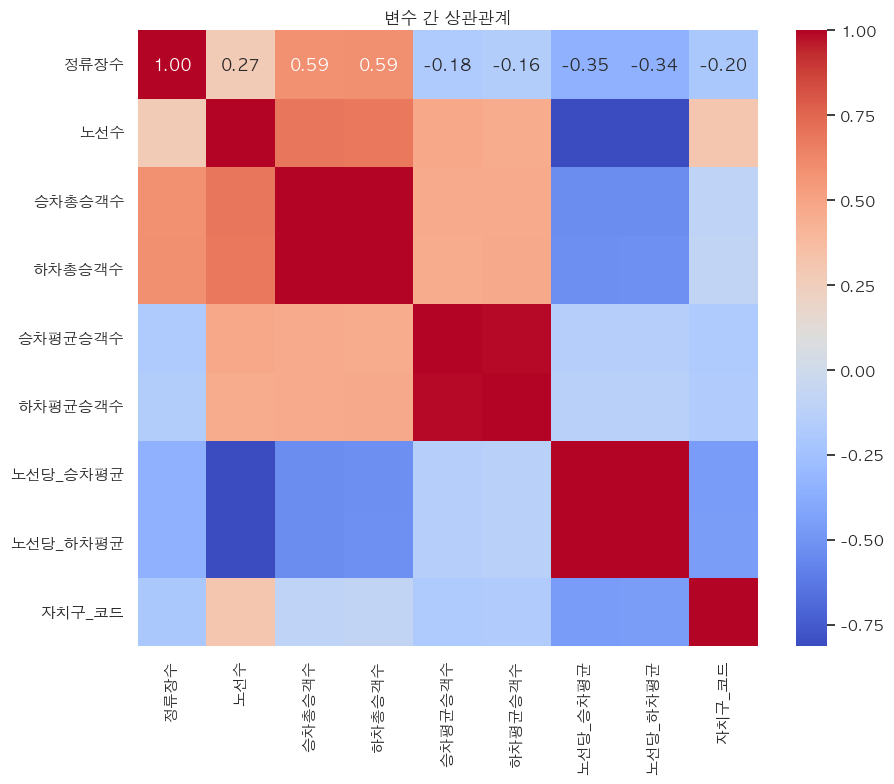

In [44]:
# '자치구' 컬럼을 숫자형 변수로 변환
seoul_bus_data['자치구_코드'] = pd.factorize(seoul_bus_data['자치구'])[0]
tmp_seoul_bus_data = seoul_bus_data.copy()
tmp_seoul_bus_data.drop('자치구',axis=1, inplace=True)
# 상관분석 수행
correlation_matrix = tmp_seoul_bus_data.corr()

# 상관분석 결과 출력
print("상관분석 결과:")
print(correlation_matrix)

# 상관분석 결과 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("변수 간 상관관계")
plt.show()

### My Insight

* **노선당 평균 승차 승객수가 높은 자치구**인 강동구, 광진구, 금천구, 도봉구, 강북구는 비교적 노선 대비 많은 승객이 이용하고 있다. 이는 해당 자치구의 버스 노선이 효율적으로 운영되고 있거나, 대중교통에 대한 수요가 높음을 나타낸다. 특히, 강동구는 노선당 평균 승차 및 하차 승객수 모두에서 가장 높은 값을 보여, 이 지역의 버스 서비스 확장 또는 최적화가 필요하다.

* **노선당 평균 승차 및 하차 승객수가 낮은 자치구**인 마포구, 서대문구, 중구, 성북구, 서초구는 버스 노선의 이용률이 상대적으로 낮다. 이는 버스 노선의 효율성을 개선하거나, **다른 교통수단과의 연계를 강화**하여 대중교통 시스템의 전반적인 사용성을 높일 필요가 있다. 마포구와 서대문구는 특히 노선당 평균 승차 및 하차 승객수가 모두 낮아, 이 지역의 대중교통 서비스 개선이 시급히다.

* 강동구와 같이 노선당 평균 승객수가 높은 자치구는 **추가적인 노선 확장**이나 **기존 노선의 개선**을 고려할 수 있다.

* 마포구, 서대문구 등 노선당 평균 승객수가 낮은 자치구는 노선의 **최적화를 통해 비효율적인 노선을 조정**하고, 필요한 경우 **노선을 감소**시키는 방안을 고려해야 한다. 동시에, 대체 교통수단과의 연계 강화 등을 통해 대중교통 시스템의 효율성을 높일 수 있는 방안을 강구해야 한다.

---